# **Introducción a la Clasificación de imágenes con ViT *(Vision Transformer)* y visualizaciones**



# Clasificación de imágenes con Vision Transformer y visualizaciones

Basado en:

1. Vision Transformer [ViT](https://arxiv.org/abs/2010.11929) keras code [code](https://github.com/keras-team/keras-io/blob/master/examples/vision/image_classification_with_vision_transformer.py)<br>
2. Agregando visualizaciones del articulo de atención multi-head: "Anatomy of the Beast with many head" https://www.linkedin.com/pulse/anatomy-beast-many-heads-code-ibrahim-sobh-phd/

***Ref.:***

- Ibrahim Sobh: https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/
- https://colab.research.google.com/drive/1bE7aJedF2U-H_Byt_4vM8UQ4ZxHc3aji?usp=sharing#scrollTo=VaImTdn2Cz5K
- Tutorial: Using Vision Transformer (ViT) to Create a Pokémon Classifier. Jeff Jeff, Dec 30, 2021, https://medium.com/@imjeffhi4/tutorial-using-vision-transformer-vit-to-create-a-pok%C3%A9mon-classifier-cb3f26ff2c20
- How the Vision Transformer (ViT) works in 10 minutes: an image is worth 16x16 words, Nikolas Adaloglouo, n2021-01-28.https://theaisummer.com/vision-transformer/
- Vision Transformer: What It Is & How It Works [2023 Guide]
A vision transformer (ViT) is a transformer-like model that handles vision processing tasks. Learn how it works and see some examples.
December 15, 2022. Deval Shah, https://www.v7labs.com/blog/vision-transformer-guide
- Tutorial 15: Vision Transformers. Phillip Lippe https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial15/Vision_Transformer.html
- Image classification with Vision Transformer. Khalid Salama, 2021/01/18, https://keras.io/examples/vision/image_classification_with_vision_transformer/
- Building a Vision Transformer from Scratch in PyTorch🔥
18 Jun 2023.(***). https://www.akshaymakes.com/blogs/vision-transformer

***Comparación de rendimiento entre ViT, ResNet y MobileNet***

- Aunque ViT muestra un excelente potencial en el aprendizaje de características de imagen de alta calidad, es inferior en rendimiento frente a ganancias de precisión.
- El escaso aumento de la precisión no justifica el escaso tiempo de ejecución de ViT.

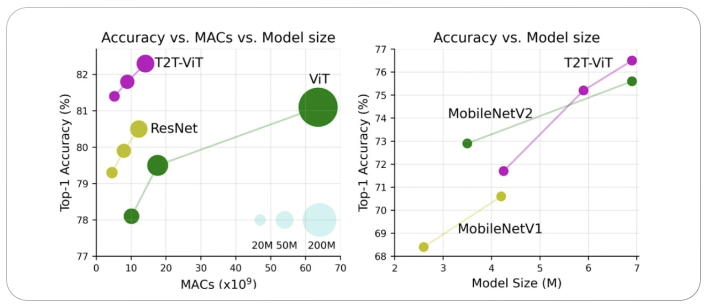

# **INTRODUCCIÓN**

#Qué es un Transformador de Visión (ViT)

El modelo Vision Transformer (ViT) se presentó en 2021 en un documento de investigación titulado "An Image is Worth 16*16 Words: Transformers for Image Recognition at Scale", publicado en ICLR 2021 (https://arxiv.org/abs/2010.11929).

El código de ajuste y los modelos ViT preentrenados están disponibles en GitHub de Google Research. Los modelos ViT se preentrenaron en los conjuntos de datos ImageNet e ImageNet-21k.

Los Transformers de visión tienen amplias aplicaciones en tareas populares de reconocimiento de imágenes, como la detección de objetos, la segmentación de imágenes, la clasificación de imágenes y el reconocimiento de acciones. Además, los ViT se aplican en tareas de modelado generativo y multimodelo, como la fundamentación visual, la respuesta a preguntas visuales y el razonamiento visual.

En los ViT, las imágenes se representan como secuencias y las etiquetas de clase de la imagen se predicen, lo que permite a los modelos aprender la estructura de la imagen de forma independiente. Las imágenes de entrada se tratan como una secuencia de parches en la que cada parche se aplana en un único vector concatenando los canales de todos los píxeles de un parche y proyectándolo linealmente a la dimensión de entrada deseada.

***Modelo General de un ViT***

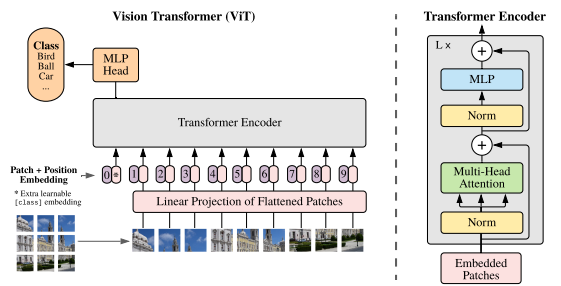

- Se divide una imagen en parches de tamaño fijo, se incrusta linealmente cada uno de ellos, se añade incrustaciones de posición, y se alimenta la secuencia resultante de vectores a un codificador Transformer estándar.
- Para realizar la clasificación, se utiliza el método estándar de añadir a la secuencia un "de clasificación" a la secuencia.
- La ilustración del codificador Transformer se inspiró en Vaswani et al. (2017).

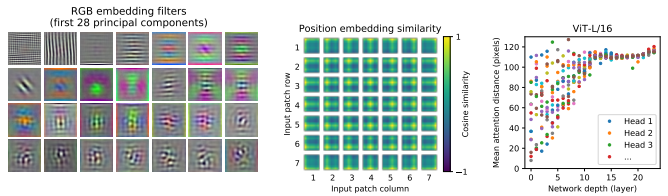

***En  la figura anterior:***

- **Izquierda**: Muestra los componentes principales superiores de los filtros de incrustación aprendidos.
- **Centro**: Se muestra que el modelo aprende a codificar la distancia dentro de la imagen en la similitud de las incrustaciones de posición, es decir, los parches más cercanos tienden a tener incrustaciones de posición más similares.
- **Derecha**: se muestran los pesos de atención. La "distancia de atención" es análoga al tamaño del campo receptivo en las CNN. Se observan que algunas cabezas prestan atención a la mayor parte de la imagen ya en las capas más bajas, lo que demuestra que el modelo utiliza la capacidad de integrar información de forma global.

- **Izquierda**: Filtros de la incrustación lineal inicial de valores RGB de ViT-L/32.
- **Centro**: Similitud de las incrustaciones de posición de ViT-L/32. Los mosaicos muestran la similitud del coseno entre la incrustación de posición del parche con la fila y columna indicadas y las incrustaciones de posición de todos los demás parches.
parches.

- **Derecha**: Tamaño del área atendida por cabeza y profundidad de la red. Cada punto muestra la distancia media de atención
distancia media de atención entre imágenes para una de las 16 cabezas en una capa.

***Nota***: Para más detalles, ver el Apéndice D.7 del artículo (https://colab.research.google.com/drive/1bE7aJedF2U-H_Byt_4vM8UQ4ZxHc3aji?usp=sharing#scrollTo=VaImTdn2Cz5K ) .

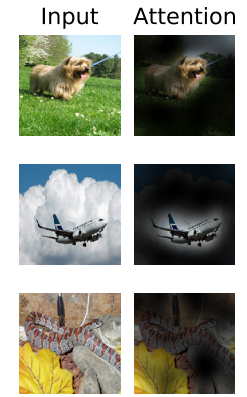

**NOTA:**

La figura anterior, muestra ejemplos representativos de atención desde el token de salida al espacio de entrada

In [ ]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
np.random.seed(1337)
import tensorflow as tf
tf.random.set_seed(1234)
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import imageio
import PIL
from PIL import Image, ImageDraw, ImageFont

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def make_video(movieName, img_list, att_list):
  with imageio.get_writer(movieName, mode='I') as writer:
      h,w = img_list[0].shape[0:2]
      for idx, img_i in enumerate(img_list):
        canvas = PIL.Image.new('RGBA', (w*2, h), 'black')
        canvas.paste(Image.fromarray(img_list[idx].astype(np.uint8)), (0, 0))
        feature_map = Image.fromarray(att_list[idx].astype(np.uint8))
        canvas.paste(feature_map, (w, 0))
        writer.append_data(np.array(canvas))

In [ ]:
num_classes = 10
input_shape = (32, 32, 3)

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 15 #100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4 #4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 1 #8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.Resizing(image_size, image_size),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


Image size: 72 X 72 pixels
Patch size: 6 X 6 pixels
Patches per image: 144 (image_size // patch_size) ** 2
Elements per patch: 108 w*h*3


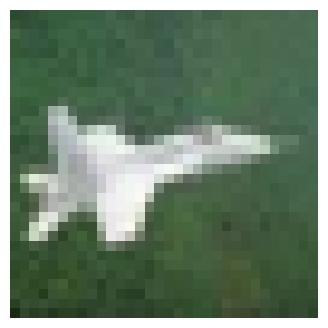

In [ ]:
plt.figure(figsize=(4, 4))
# image = x_train[np.random.choice(range(x_train.shape[0]))]

image = x_train[77]

plt.imshow(np.squeeze(image.astype("uint8")), cmap='gray')

plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size} pixels")
print(f"Patch size: {patch_size} X {patch_size} pixels")
print(f"Patches per image: {patches.shape[1]} (image_size // patch_size) ** 2")
print(f"Elements per patch: {patches.shape[-1]} w*h*3")


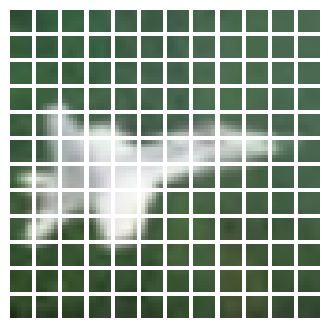

In [ ]:
#
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(np.squeeze(patch_img.numpy().astype("uint8")), cmap='gray')
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)

    # Augment data.
    augmented = data_augmentation(inputs)

    # Create patches.
    patches = Patches(patch_size)(augmented)

    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # no pos encoding!
    # encoded_patches = PatchEncoder2(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    # attention_scores_list = []

    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

        # Create a multi-head attention layer.
        attention_output, attention_scores_items = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(x1, x1, return_attention_scores=True)

        # attention_scores_list.append(attention_scores_items)
        # Skip connection 1.

        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    # Classify outputs.
    logits = layers.Dense(num_classes)(features)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)

    model_att = keras.Model(inputs=inputs, outputs=attention_scores_items)
    return model, model_att

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print("-"*50)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier, at_model = create_vit_classifier()
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 72, 72, 3)            7         ['input_1[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches_1 (Patches)         (None, None, 108)            0         ['data_augmentation[0][0]']   
                                                                                                  
 patch_encoder (PatchEncode  (None, 144, 64)              16192     ['patches_1[0][0]']       

In [ ]:
at_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 72, 72, 3)            7         ['input_1[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches_1 (Patches)         (None, None, 108)            0         ['data_augmentation[0][0]']   
                                                                                                  
 patch_encoder (PatchEncode  (None, 144, 64)              16192     ['patches_1[0][0]']     

In [ ]:
history = run_experiment(vit_classifier)

Epoch 1/15
176/176 [==============================] - 21s 71ms/step - loss: 2.1165 - accuracy: 0.3184 - top-5-accuracy: 0.8106 - val_loss: 1.5484 - val_accuracy: 0.4494 - val_top-5-accuracy: 0.9040
Epoch 2/15
176/176 [==============================] - 12s 69ms/step - loss: 1.5614 - accuracy: 0.4354 - top-5-accuracy: 0.9017 - val_loss: 1.3127 - val_accuracy: 0.5264 - val_top-5-accuracy: 0.9340
Epoch 3/15
176/176 [==============================] - 12s 70ms/step - loss: 1.3776 - accuracy: 0.5051 - top-5-accuracy: 0.9285 - val_loss: 1.1962 - val_accuracy: 0.5710 - val_top-5-accuracy: 0.9518
Epoch 4/15
176/176 [==============================] - 12s 69ms/step - loss: 1.2532 - accuracy: 0.5499 - top-5-accuracy: 0.9445 - val_loss: 1.1077 - val_accuracy: 0.6102 - val_top-5-accuracy: 0.9602
Epoch 5/15
176/176 [==============================] - 12s 68ms/step - loss: 1.1512 - accuracy: 0.5889 - top-5-accuracy: 0.9550 - val_loss: 1.0702 - val_accuracy: 0.6194 - val_top-5-accuracy: 0.9610
Epoch 6/15

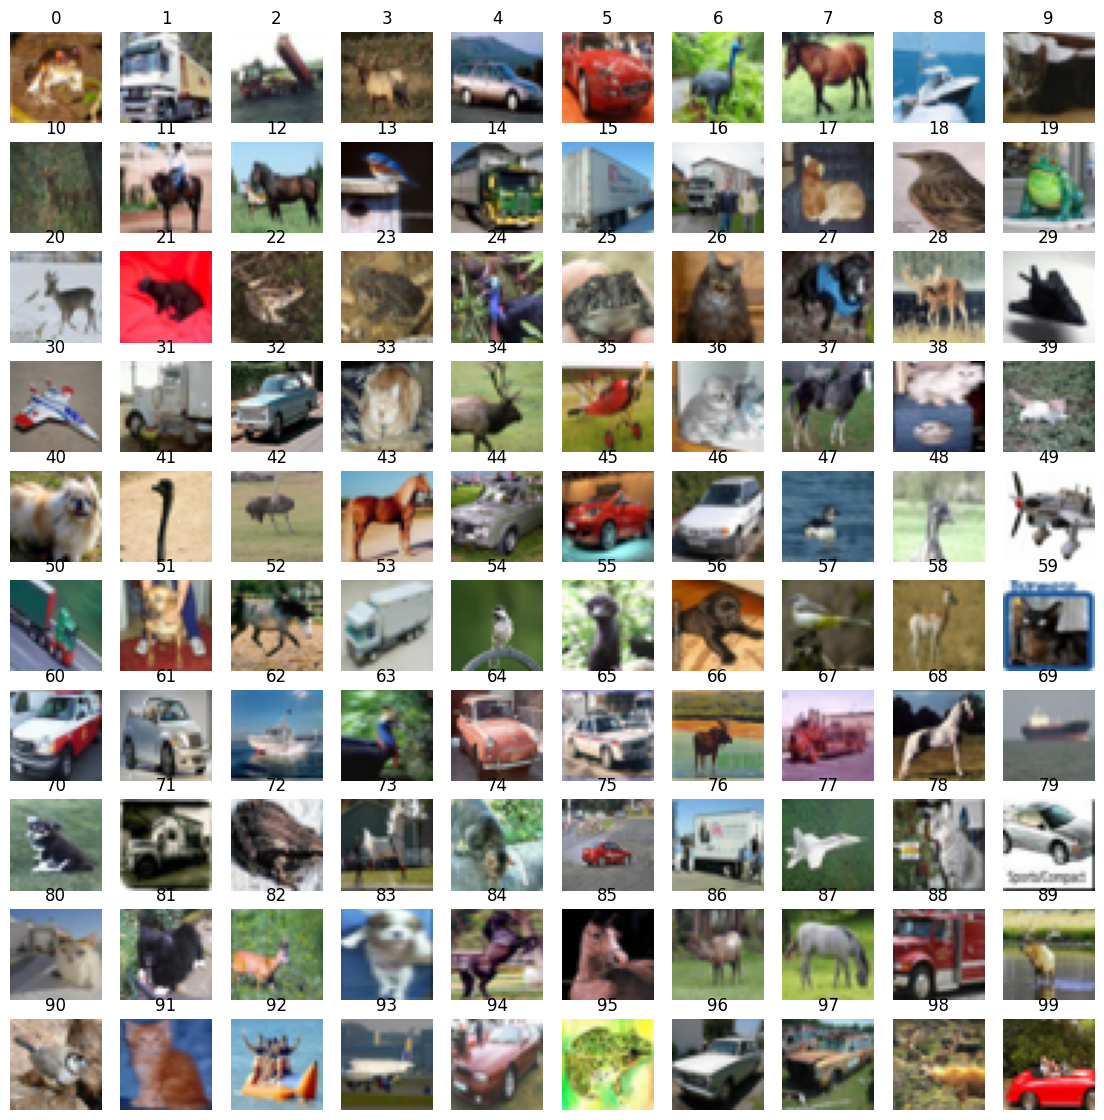

In [ ]:
plt.figure(figsize=(14, 14))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(np.squeeze(x_train[i]))
    plt.title(str(i))
    plt.axis("off")

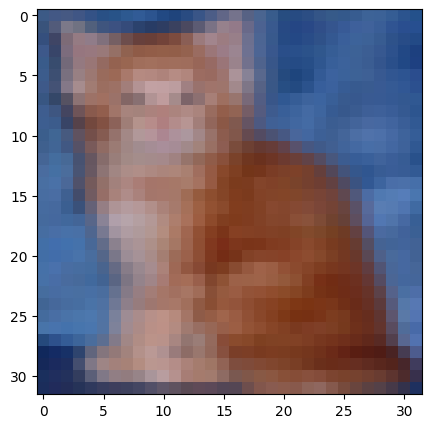

In [ ]:
selected_image_index = 91
plt.figure(figsize=(5, 5))
image = x_train[selected_image_index]
plt.imshow(np.squeeze(image))
plt.show()

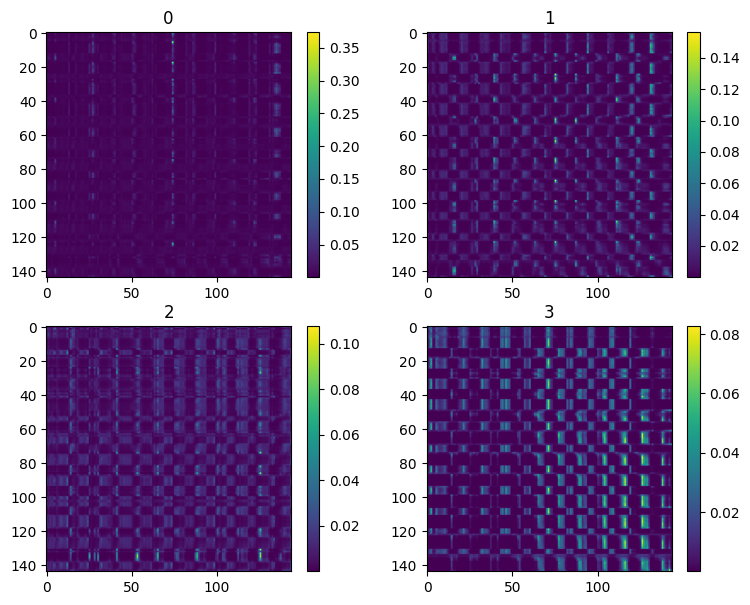

In [ ]:
plt.figure(figsize=(9, 7))
for h in range(4):
    ax = plt.subplot(2, 2, h + 1)
    att_results = at_model(np.expand_dims(x_train[selected_image_index], axis=0))
    plt.imshow(att_results[0,h,:])
    plt.title(str(h))
    plt.colorbar()

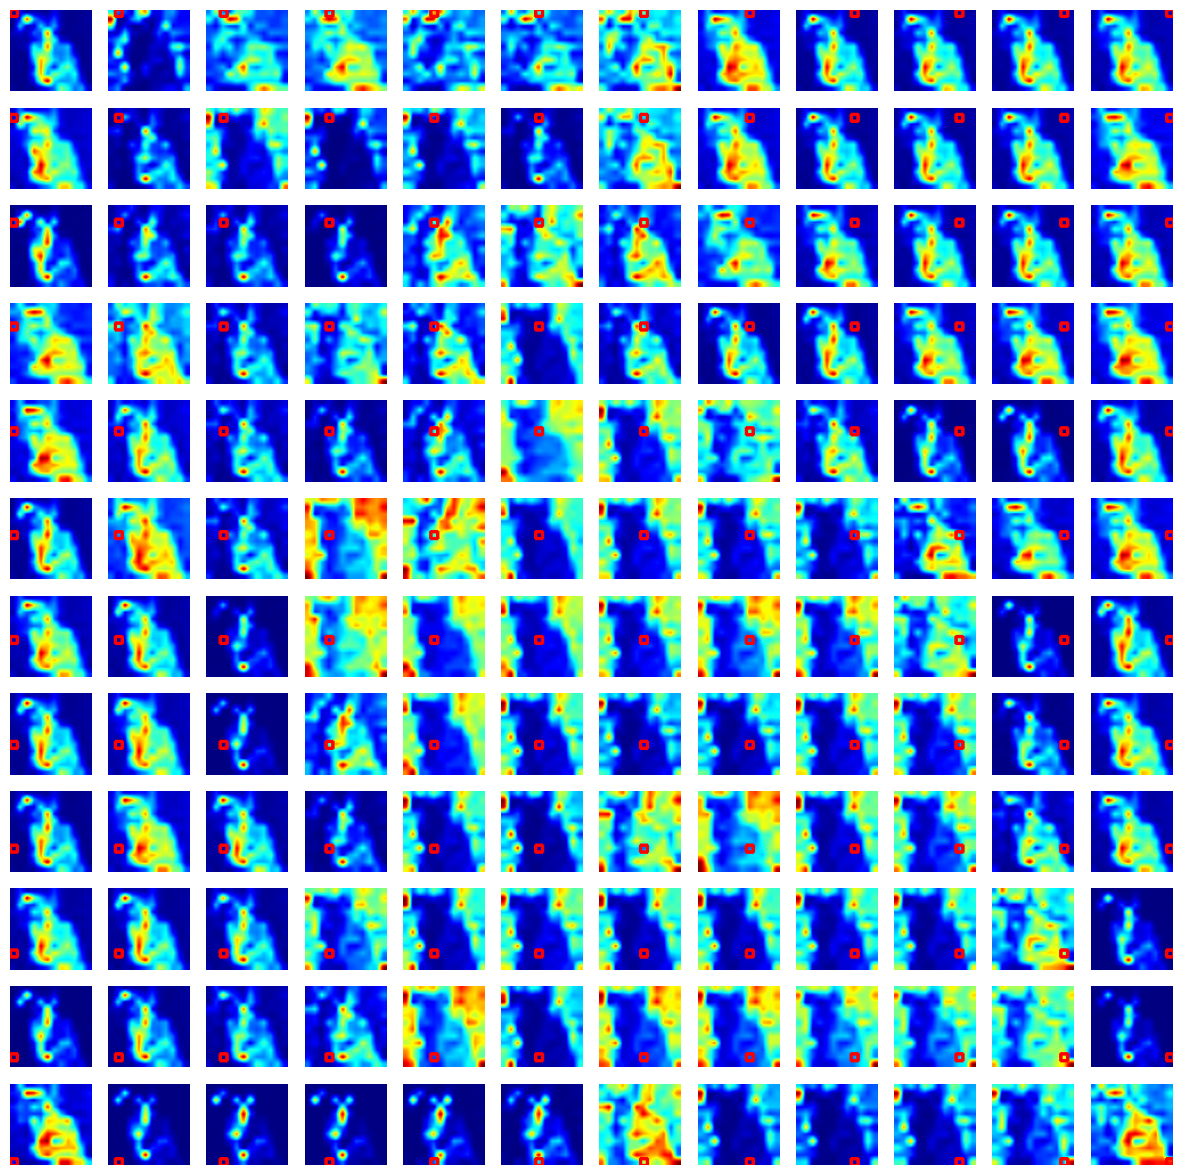

In [ ]:
head_index =  2
att_list = []
patch_list = []
std_list = []
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(15, 15))
for selected_q_index in range(n*n):
  ax = plt.subplot(n, n, selected_q_index + 1)

  att_mask  = tf.reshape(att_results[0, head_index, selected_q_index, :], [n, n])
  feature_map = att_mask.numpy()
  std_list.append(np.std(feature_map))
  feature_map /= np.max(feature_map)
  feature_map *= 255
  feature_map = np.clip(feature_map, 0, 255).astype('uint8')
  feature_map = cv2.resize(feature_map, (image_size, image_size))


  feature_map = cv2.applyColorMap(feature_map, cv2.COLORMAP_JET)
  feature_map = cv2.cvtColor(feature_map, cv2.COLOR_BGR2RGB)

  image_patch = cv2.resize(image, (image_size, image_size))
  n = int(np.sqrt(num_patches))
  x = selected_q_index % n
  y = selected_q_index // n
  cv2.rectangle(feature_map, (x*patch_size, y*patch_size), ((x*patch_size)+patch_size, (y*patch_size)+patch_size), 255, 2)
  cv2.rectangle(image_patch, (x*patch_size, y*patch_size), ((x*patch_size)+patch_size, (y*patch_size)+patch_size), 255, 2)

  # feature_map = feature_map + (0.3 * image_patch).astype('uint8')
  # image_patch = image_patch + (0.3 * feature_map).astype('uint8')
  image_patch = cv2.addWeighted(image_patch,1.0,feature_map,0.2,0)
  att_list.append(feature_map)
  patch_list.append(image_patch)
  # cv2_imshow(feature_map)
  plt.imshow(feature_map)
  # plt.imshow(image_patch)
  #plt.imshow(image_patch, cmap='gray')
  # cv2_imshow(feature_map)
  plt.axis("off")


In [ ]:
#
make_video('att_cifar_L1H1_91_h3.mp4', patch_list, att_list)